In [ ]:
# Import Spark modules
from pyspark.sql import SparkSession

# Setup Spark session
spark = SparkSession.builder.appName("Explore_ft_i94").enableHiveSupport().getOrCreate()

---

In [2]:
# Define Schema for df_ft_i94
from pyspark.sql.types import *
from pyspark.sql.functions import *

schema = StructType(list((
	StructField("_c0",DoubleType(),True),
	StructField("cicid",DoubleType(),True), 
	StructField("i94yr",DoubleType(),True), 
	StructField("i94mon",DoubleType(),True), 
	StructField("i94cit",DoubleType(),True), 
	StructField("i94res",DoubleType(),True), 
	StructField("i94port",StringType(),True), 
	StructField("arrdate",DoubleType(),True), 
	StructField("i94mode",DoubleType(),True), 
	StructField("i94addr",StringType(),True), 
	StructField("depdate",DoubleType(),True), 
	StructField("i94bir",DoubleType(),True), 
	StructField("i94visa",DoubleType(),True), 
	StructField("count",DoubleType(),True), 
	StructField("dtadfile",StringType(),True), 
	StructField("visapost",StringType(),True), 
	StructField("occup",StringType(),True), 
	StructField("entdepa",StringType(),True), 
	StructField("entdepd",StringType(),True), 
	StructField("entdepu",StringType(),True), 
	StructField("matflag",StringType(),True), 
	StructField("biryear",DoubleType(),True), 
	StructField("dtaddto",StringType(),True), 
	StructField("gender",StringType(),True), 
	StructField("insnum",StringType(),True), 
	StructField("airline",StringType(),True), 
	StructField("admnum",DoubleType(),True), 
	StructField("fltno",StringType(),True), 
	StructField("visatype",StringType(),True)
    ))
);


In [3]:
"""
 Use this section to toggle between different datasets to do quick spot checks
 and switch bigger datasets when doing full data checks.
"""

## Variables
S3_STAGE = 's3_staging/'
I94_TABLE_FLS ='s3://kbucket-udfls/i94_table_fls/'
I94_SAS_EXTRACTS = 'i94_sas_extracts/'

# Read parquet files: (GBs files) -- Full year data (AWS)
#df_ft_i94 = spark.read.parquet(I94_TABLE_FLS+'ft_i94')

# Read parquet files: (GBs files) -- Full year data (local fs)
df_ft_i94 = spark.read.parquet(S3_STAGE+'ft_i94')

# Ran this with sample files (MB file) -- 1 month data
#df_ft_i94_aug = spark.read.parquet(I94_SAS_EXTRACTS+'i94_aug16')

# Check schema
#df_ft_i94_aug.schema

# Ran this with sample file -- 142K file
#df_ft_i94 = spark.read.csv('immigration_data_sample.csv', header=True, schema=schema)

In [4]:
# Remove first column from csv (not present in full dataset for df_ft_i94)
# Looks to be additional row identifer

#df_ft_i94 = df_ft_i94.drop('_c0')

In [5]:
df_ft_i94.printSchema()

root
 |-- cicid: double (nullable = true)
 |-- i94yr: double (nullable = true)
 |-- i94mon: double (nullable = true)
 |-- i94cit: double (nullable = true)
 |-- i94res: double (nullable = true)
 |-- i94port: string (nullable = true)
 |-- arrdate: double (nullable = true)
 |-- i94mode: double (nullable = true)
 |-- i94addr: string (nullable = true)
 |-- depdate: double (nullable = true)
 |-- i94bir: double (nullable = true)
 |-- i94visa: double (nullable = true)
 |-- count: double (nullable = true)
 |-- dtadfile: string (nullable = true)
 |-- visapost: string (nullable = true)
 |-- occup: string (nullable = true)
 |-- entdepa: string (nullable = true)
 |-- entdepd: string (nullable = true)
 |-- entdepu: string (nullable = true)
 |-- matflag: string (nullable = true)
 |-- biryear: double (nullable = true)
 |-- dtaddto: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- insnum: string (nullable = true)
 |-- airline: string (nullable = true)
 |-- admnum: double (nullable = 

In [6]:
df_ft_i94.show(2)

+---------+------+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-----+-------+-------+-------+-------+-------+--------+------+------+-------+--------------+-----+--------+
|    cicid| i94yr|i94mon|i94cit|i94res|i94port|arrdate|i94mode|i94addr|depdate|i94bir|i94visa|count|dtadfile|visapost|occup|entdepa|entdepd|entdepu|matflag|biryear| dtaddto|gender|insnum|airline|        admnum|fltno|visatype|
+---------+------+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-----+-------+-------+-------+-------+-------+--------+------+------+-------+--------------+-----+--------+
|5927066.0|2016.0|   6.0| 575.0| 575.0|    HOU|20633.0|    1.0|     FL|20637.0|  38.0|    2.0|  1.0|20160628|     SNJ| null|      G|      O|   null|      M| 1978.0|12272016|     F|  null|     NK|1.522654484E10|00499|      B2|
|5927067.0|2016.0|   6.0| 689.0| 689.0|    MIA|20633.0|    1.0|     FL|   null|  48.0|    2.0|  

In [7]:
# Create a temp view for exploring it
df_ft_i94.createOrReplaceTempView('ft_i94')

In [8]:
spark.sql("""
    SELECT *
    FROM ft_i94
    LIMIT 10
    """).show()

+---------+------+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-----+-------+-------+-------+-------+-------+--------+------+------+-------+--------------+-----+--------+
|    cicid| i94yr|i94mon|i94cit|i94res|i94port|arrdate|i94mode|i94addr|depdate|i94bir|i94visa|count|dtadfile|visapost|occup|entdepa|entdepd|entdepu|matflag|biryear| dtaddto|gender|insnum|airline|        admnum|fltno|visatype|
+---------+------+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-----+-------+-------+-------+-------+-------+--------+------+------+-------+--------------+-----+--------+
|5927066.0|2016.0|   6.0| 575.0| 575.0|    HOU|20633.0|    1.0|     FL|20637.0|  38.0|    2.0|  1.0|20160628|     SNJ| null|      G|      O|   null|      M| 1978.0|12272016|     F|  null|     NK|1.522654484E10|00499|      B2|
|5927067.0|2016.0|   6.0| 689.0| 689.0|    MIA|20633.0|    1.0|     FL|   null|  48.0|    2.0|  

In [9]:
# Count of Missing values
from pyspark.sql.functions import isnan, when, count, col

import pandas as pd
df_col_nas = df_ft_i94.select([(count(when(isnan(c), c))/df_ft_i94.count()*100).alias(c) for c in df_ft_i94.columns])

In [10]:
# Convert resultset to Pandas
df_col_nas_pd = df_col_nas.toPandas()

In [11]:
# Check results
df_col_nas_pd.head()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Percentage count of any NaN entries
print('Total Percentage of NaN entries:',df_col_nas_pd.values.sum())

Total Percentage of NaN entries: 0.0


In [13]:
# Graph the above result for visual reference
import matplotlib.pyplot as plt
if df_col_nas_pd.values.sum():
    df_col_nas_pd.plot(y=df_col_nas_pd.columns, kind='bar', title='Percentage of Missing values (NaN)', figsize=(5,8));
else:
    print('0 Missing values')

0 Missing values


In [14]:
# Count of null values
from pyspark.sql.functions import isnan, when, count, col
import pandas as pd
df_col_nulls = df_ft_i94.select([(count(when(col(c).isNull(), c))/df_ft_i94.count()*100).alias(c) for c in df_ft_i94.columns])

In [15]:
# Convert resultset to Pandas dataframe
df_col_nulls_pd = df_col_nulls.toPandas()

In [16]:
# Check results
df_col_nulls_pd.head()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,0.0,0.0,0.0,0.014545,0.0,0.0,0.0,1.71153,5.204603,8.029983,...,99.980056,7.960948,0.017874,1.724984,16.285169,96.726563,4.433888,0.0,2.022272,0.0


In [17]:
# Percentage count null entries
print('Total Percentage of null entries:' ,df_col_nulls_pd.values.sum()/len(df_col_nulls_pd.columns))

Total Percentage of null entries: 14.7276846766


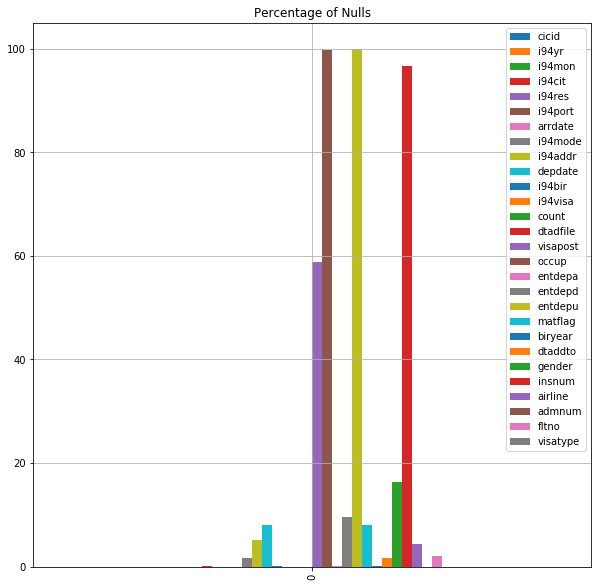

In [18]:
# Graph the above result for visual reference
import matplotlib.pyplot as plt
if df_col_nulls_pd.values.sum():
    df_col_nulls_pd.plot(kind='bar', title='Percentage of Nulls', figsize=(10,10), grid=True);
else:
    print('0 Null values')

In [19]:
# From Graph above, looks like following columns may need to be dropped.
"""
# These are close to 100% nulls/missing data making them useless for drawing insights
- OCCUP (~100% missing)
- ENTDEPU (~100% missing)
- INSNUM (~90% missing)

Other columns like VISAPOST appears to be an expection. Related column I94VISA and VISATYPE are present with sufficient data
** One conclusion after doing more analysis with data, VISAPOST is not valid for cases with Visa Waiver programs, so VISA issue post may be not valid in these cases.
** Will keep work with this column but be mindful that nearly 60% of data is not valid.
"""

# Other columns show low percentages, so will continue with data as is in tables.

'\n# These are close to 100% nulls/missing data making them useless for drawing insights\n- OCCUP (~100% missing)\n- ENTDEPU (~100% missing)\n- INSNUM (~90% missing)\n\nOther columns like VISAPOST appears to be an expection. Related column I94VISA and VISATYPE are present with sufficient data\n** One conclusion after doing more analysis with data, VISAPOST is not valid for cases with Visa Waiver programs, so VISA issue post may be not valid in these cases.\n** Will keep work with this column but be mindful that nearly 60% of data is not valid.\n'

In [20]:
# Dropping columns occup, entdepu, insum
df_ft_i94 = df_ft_i94.drop('occup').drop('entdepu').drop('insnum')


In [21]:
# Check percentage of null entries again:
df_col_nulls = df_ft_i94.select([(count(when(col(c).isNull(), c))/df_ft_i94.count()*100).alias(c) for c in df_ft_i94.columns])

# We'll ignore visapost here and check the rest
df_col_nulls_pd = df_col_nulls.drop('visapost').toPandas()

df_col_nulls_pd.head()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,entdepa,entdepd,matflag,biryear,dtaddto,gender,airline,admnum,fltno,visatype
0,0.0,0.0,0.0,0.014545,0.0,0.0,0.0,1.71153,5.204603,8.029983,...,0.045567,9.604729,7.960948,0.017874,1.724984,16.285169,4.433888,0.0,2.022272,0.0


In [22]:
# Percentage count of any null entries
print('Total Percentage of null entries:' ,df_col_nulls_pd.values.sum()/len(df_col_nulls_pd.columns))

Total Percentage of null entries: 2.3780935643


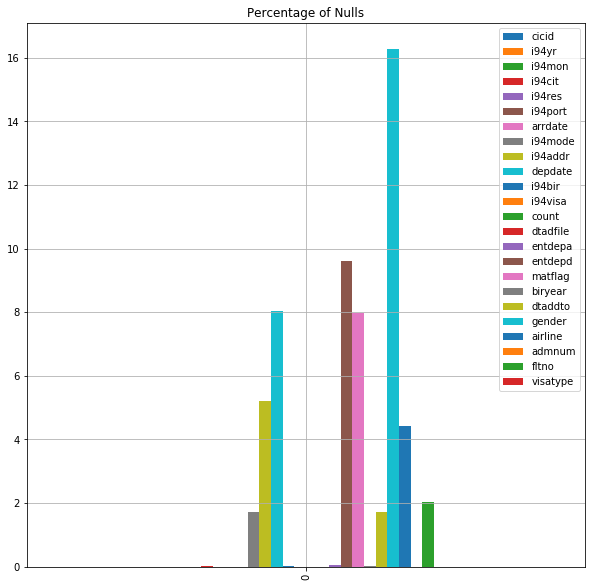

In [23]:
# Graph the above result for visual reference
import matplotlib.pyplot as plt
if df_col_nulls_pd.values.sum():
    df_col_nulls_pd.plot(kind='bar', title='Percentage of Nulls', figsize=(10,10), grid=True);
else:
    print('0 Null values')

In [24]:
# From Graph above, looks all other columns have low null count now. 
"""
# Overall null has droped to ~1.6%
# Other like GENDER is only major column with nulls. ~16%
    One hypothesis, people not reporting since question only have options of Male/Female 
    or choosing 'Prefer not to disclose', maybe within LGBT.

# Other columns I94ADDR, DEPDATE, ENTDEPD, MATFLAG, AIRLINE, FLTNO less than ~6% nulls 
  which looks good enough for analysis. One date about dates is dataset only for 2016 alone.
  Could have people entering US and not leaving within same year e.g. Students on longer term studies
"""

"\n# Overall null has droped to ~1.6%\n# Other like GENDER is only major column with nulls. ~16%\n    One hypothesis, people not reporting since question only have options of Male/Female \n    or choosing 'Prefer not to disclose', maybe within LGBT.\n\n# Other columns I94ADDR, DEPDATE, ENTDEPD, MATFLAG, AIRLINE, FLTNO less than ~6% nulls \n  which looks good enough for analysis. One date about dates is dataset only for 2016 alone.\n  Could have people entering US and not leaving within same year e.g. Students on longer term studies\n"

In [25]:
# Do duplication check and drop duplicates

# Current count:
print('Current df_ft_i94 row count:', df_ft_i94.count())

Current df_ft_i94 row count: 3574989


In [26]:
# Dropping duplicates:
df_ft_i94_nodup = df_ft_i94.dropDuplicates()

In [27]:
# Show now row count:
print('After dropping duplicates df_ft_i94_nodup row count:', df_ft_i94_nodup.count())

After dropping duplicates df_ft_i94_nodup row count: 3574989


In [28]:
# Diff seen to be 0. So, no duplicate rows detected
print('Difference row count:', df_ft_i94.count()-df_ft_i94_nodup.count())

Difference row count: 0


In [31]:
print(df_ft_i94.columns)

['cicid', 'i94yr', 'i94mon', 'i94cit', 'i94res', 'i94port', 'arrdate', 'i94mode', 'i94addr', 'depdate', 'i94bir', 'i94visa', 'count', 'dtadfile', 'visapost', 'entdepa', 'entdepd', 'matflag', 'biryear', 'dtaddto', 'gender', 'airline', 'admnum', 'fltno', 'visatype']
